In [157]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(9,6)}) # добавляет размер графика

In [193]:
#events_data_ = pd.read_csv(r'https://stepik.org/media/attachments/course/4852/event_data_train.zip') # тоже открывает zip
#submissions_data_train_ = pd.read_csv(r'https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')
events_data = pd.read_csv('event_data_train.csv')
submissions_data = pd.read_csv('submissions_data_train.csv')
events_data.head(13)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [194]:
events_data['data'] = pd.to_datetime(events_data.timestamp, unit='s') # unit='s' в секундах
events_data.head()

,step_id,timestamp,action,user_id,data
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [195]:
events_data.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
data         datetime64[ns]
dtype: object

In [196]:
events_data.data.max()

Timestamp('2018-05-19 23:33:31')

In [197]:
events_data['day'] = events_data['data'].dt.date # events_data['day'] = events_data.data.dt.date
events_data.head()

,step_id,timestamp,action,user_id,data,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [198]:
events_data.groupby('day') \
    .user_id.nunique().head(10)

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
2015-06-20    294
2015-06-21    292
2015-06-22    516
2015-06-23    520
2015-06-24    471
Name: user_id, dtype: int64

In [199]:
events_data.groupby('day') \
    .user_id.value_counts().head(10)

day         user_id
2015-06-15  1046       567
            26763      272
            2446       241
            1808       223
            16503      210
            5602       206
            13793      205
            11696      204
            4406       194
            5440       190
Name: user_id, dtype: int64

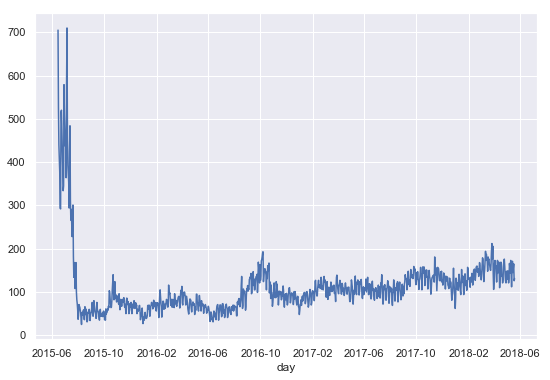

In [200]:
events_data.groupby('day') \
    .user_id.nunique().plot()

In [201]:
events_data[events_data.action == "passed"].groupby('user_id', as_index=False).agg({'step_id': 'count'}).rename(columns={'step_id': 'passed_steps'}).head()

,user_id,passed_steps
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84


In [202]:
events_data[events_data.action == "passed"].groupby('user_id', as_index=False).agg({'step_id': 'count'}).rename(columns={'step_id': 'passed_steps'}).shape


(17262, 2)

In [203]:

# events_data.query('action == "passed"') \
#     .groupby('user_id', as_index=False) \
#     .agg({'step_id': 'count'}).head()


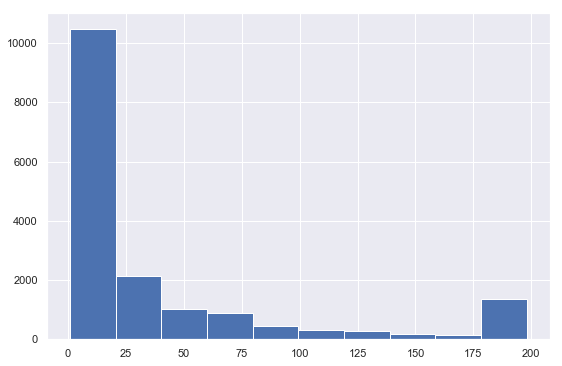

In [204]:
# с учетом только тех пользователей, котрые прошли степ
events_data.query('action == "passed"').groupby('user_id', as_index=False).agg({'step_id': 'count'}).rename(columns={'step_id': 'passed_steps'}).passed_steps.hist()

In [205]:
events_data.pivot_table(index="user_id", 
                        columns='action', 
                        values="step_id", 
                        aggfunc='count', 
                        fill_value=0).head()
                    
# fill_value=0 - подставляет 0 вместо NaN
# values="step_id" - С какими значениями будем делать агрегационную функцию, step_id - это урок на курсе, 
# т е для каждого юзераподсчитываем количества уроков (пройденных, для какого кол-ва уроков было сделано столько попыток, сколько уроков просмотренных

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1


In [206]:
users_scores1 = events_data.pivot_table(index="user_id", 
                        columns='action', 
                        values="step_id", 
                        aggfunc='count', 
                        fill_value=0).reset_index().head()
# .reset_index() - убирает индекс user_id - обновляет
users_scores1

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


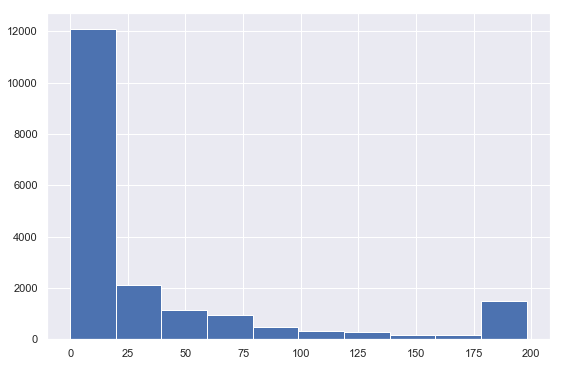

In [209]:
events_data.pivot_table(index="user_id", 
                        columns='action', 
                        values="step_id", 
                        aggfunc='count', 
                        fill_value=0).reset_index().discovered.hist()

In [210]:
s1 = events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day']).head()
s1

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230


In [212]:
events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day']).groupby('user_id')['timestamp'].apply(list).head()
# s2.shape

user_id
1                                         [1472827464]
2                             [1514383364, 1519226966]
3    [1434358476, 1441257725, 1441440209, 144153391...
5                             [1466156809, 1499859621]
7                                         [1521634660]
Name: timestamp, dtype: object

In [213]:
gap_data = events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day']).groupby('user_id')['timestamp'].apply(list).apply(np.diff).head()
gap_data
# разность между прилайщими наблюдениями np.diff

user_id
1                                                  []
2                                           [4843602]
3    [6899249, 182484, 93710, 2768870, 171400, 78712]
5                                          [33702812]
7                                                  []
Name: timestamp, dtype: object

In [214]:
gap_data = events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day']).groupby('user_id')['timestamp'].apply(list).apply(np.diff).values
gap_data

array([array([], dtype=int32), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
          98252,    57019]),
       array([1567990]), array([], dtype=int32)], dtype=object)

In [215]:
np.concatenate(gap_data, axis=0) # ось 0 - строкам


array([4843602, 6899249,  182484, ...,   98252,   57019, 1567990])

In [216]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))
#gap_data = gap_data/ (24 * 60 * 60) # разница в днях, которая наблюдалась у пОльзователей в перерывах между заходами на курс
#gap_data

In [217]:
#gap_data[gap_data < 200].hist() # большая часть промежутков в днях (gap_data) оказывается в диапазоне меньше 200 дней между двумя заходами пользователей 
# (рассчитано для каждого пользоватля

In [218]:
#gap_data.quantile(0.95) # только 5% пользователей возвращвется на курс в перерыве 59,76 = 60 дней ---> gap_data.quantile(0.95)--->59.760440972222156

In [219]:
#gap_data.quantile(0.9)

In [220]:
#Итого:
gap_data.quantile(0.9) / (24 * 60 * 60)

18.325995370370403

In [221]:
# Если пользователь не получил сертификат и больше чем 30 дней не был на платформе, то такой пользователь считается грохнувшимся
# Нижний ряд - конечная финальная дата , от него будет считать отвалившихся пользоватей
events_data.tail()

,step_id,timestamp,action,user_id,data,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [222]:
#конечная финальная дата курса
now = events_data.timestamp.max()
now

1526772811

In [223]:
# максимальное время появления на курсе для каждого пользователя
user_data = events_data.groupby('user_id', as_index=False).agg({'timestamp': 'max'}).rename(columns={'timestamp': 'last_timestamp'})
user_data.head()


,user_id,last_timestamp,is_gone_user
0,1,1472827464,53945347
1,2,1519226966,7545845
2,3,1444581588,82191223
3,5,1499859939,26912872
4,7,1521634660,5138151


In [224]:
user_data['is_gone_user'] = now - user_data.last_timestamp
user_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,53945347
1,2,1519226966,7545845
2,3,1444581588,82191223
3,5,1499859939,26912872
4,7,1521634660,5138151


In [225]:
# сколько дней не было на курсе , например, 30 дней (между 90% и 95%)
drop_out_threshold = 30 * 24 * 60 *60

In [226]:
# спрoсим, больше ли реальная разница (реальное время отсутствия на курсе) чем рассчитаноое нами время
# если это так то пользователь будет записан в набор отвалившихся "is_gone_user'
user_data['is_gone_user'] = (now - user_data.last_timestamp) > drop_out_threshold
user_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [227]:
users_scores = submissions_data.pivot_table(index="user_id", 
                        columns='submission_status', 
                        values="step_id", 
                        aggfunc='count', 
                        fill_value=0).reset_index().head()
# .reset_index() - убирает индекс user_id - обновляет
users_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [228]:
user_data.merge(users_scores).head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,2,1519226966,True,2,0
1,3,1444581588,True,29,23
2,5,1499859939,True,2,2
3,8,1481466913,True,9,21
4,14,1436368676,True,0,1


In [230]:
user_data.merge(users_scores, on='user_id',how='outer').head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN


In [235]:
user_data = user_data.merge(users_scores, on='user_id',how='outer').fillna(0).head(20)
user_data

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
5,8,1481466913,True,9.0,21.0
6,9,1484999497,True,0.0,0.0
7,11,1526140625,False,0.0,0.0
8,14,1436368676,True,0.0,1.0
9,16,1513162585,True,0.0,0.0


In [234]:
users_events_data = events_data.pivot_table(index="user_id", 
                        columns='action', 
                        values="step_id", 
                        aggfunc='count', 
                        fill_value=0).reset_index()
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [236]:
user_data = user_data.merge(users_events_data, how='outer')
user_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1.472827e+09,True,0.0,0.0,1,0,0,1
1,2,1.519227e+09,True,2.0,0.0,9,9,2,10
2,3,1.444582e+09,True,29.0,23.0,91,87,30,192
3,5,1.499860e+09,True,2.0,2.0,11,11,4,12
4,7,1.521635e+09,True,0.0,0.0,1,1,0,1


In [241]:
user_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()
user_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [242]:
user_data = user_data.merge(user_days, how='outer')
user_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1.472827e+09,True,0.0,0.0,1,0,0,1,1
1,2,1.519227e+09,True,2.0,0.0,9,9,2,10,2
2,3,1.444582e+09,True,29.0,23.0,91,87,30,192,7
3,5,1.499860e+09,True,2.0,2.0,11,11,4,12,2
4,7,1.521635e+09,True,0.0,0.0,1,1,0,1,1


In [243]:
user_data.user_id.nunique() # Проверяем, не потеряли ли кого-то

19234

In [244]:
events_data.user_id.nunique()

19234

In [249]:
# прошёл ли юзер успешно курс
user_data['passed_course'] = user_data.passed > 170
user_data.head()


,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed cours,passed course,passed_course
0,1,1.472827e+09,True,0.0,0.0,1,0,0,1,1,False,False,False
1,2,1.519227e+09,True,2.0,0.0,9,9,2,10,2,False,False,False
2,3,1.444582e+09,True,29.0,23.0,91,87,30,192,7,False,False,False
3,5,1.499860e+09,True,2.0,2.0,11,11,4,12,2,False,False,False
4,7,1.521635e+09,True,0.0,0.0,1,1,0,1,1,False,False,False


In [250]:
user_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed cours,passed course
passed_course,,,,,,,,,,,,
False,17809,17,17,17,17,17809,17809,17809,17809,17809,17809,17809
True,1425,3,3,3,3,1425,1425,1425,1425,1425,1425,1425


In [251]:
100 * 1425 / 17809 # процентное соотношение прошедших курс

8.001572238755685